# Libraries for Neural Networks - PyTorch



## Import Libraries

Installs a specific PyTorch version

In [1]:
%%capture
!pip install torch==1.5.0+cu101 torchvision==0.6.0+cu101 -f https://download.pytorch.org/whl/torch_stable.html

In [2]:
import torch
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import MinMaxScaler
import torch.nn as nn
import pandas as pd
torch.__version__

'1.5.0+cu101'

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Loading the dataset


In [118]:
diabetes = pd.read_csv('/content/drive/MyDrive/exercise-4/Pytorch introduction/diabetes.csv')
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Data Preprocessing

### Splitting the dataset into the Training set and Test set

We will split the data into features and labeling (X,y)

In [145]:
X = diabetes.iloc[:, 0:8].values
y = diabetes.iloc[:,8].values

Scaling

In [146]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

We will separate the training set from the test set

In [240]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

### Data transformation


When we use Pytorch we will have to work with a different type of data structure and not a Numpy array

In [241]:
type(X_train)

numpy.ndarray

Therefore, we will convert the data structure type to PyTorch Tensor

In [242]:
X_train = torch.tensor(X_train, dtype=torch.float)
y_train = torch.tensor(y_train, dtype=torch.float)

In [243]:
type(X_train)

torch.Tensor

Now we will use Tensor Dataset to connect the features and labeling and create a complete dataset. And now we can work with this data in PyTorch neural networks.

In [244]:
dataset = torch.utils.data.TensorDataset(X_train, y_train)

In [245]:
type(dataset)

torch.utils.data.dataset.TensorDataset

Now we will use Data loader. It will combines a dataset and a sampler, and provides an iterable over the given dataset (also divides the data into batches(.

In [246]:
train_loader = torch.utils.data.DataLoader(dataset, batch_size=8)

## Neural network structure
8 -> 64 -> 32 -> 16 -> 1

In [264]:
network = nn.Sequential(nn.Linear(8, 64),
                          nn.ReLU(),
                          nn.Linear(64, 32),
                          nn.ReLU(),
                          nn.Linear(32, 16),
                          nn.ReLU(),
                          nn.Linear(16, 1),
                          nn.Sigmoid())

Network summary

In [265]:
network.parameters

<bound method Module.parameters of Sequential(
  (0): Linear(in_features=8, out_features=64, bias=True)
  (1): ReLU()
  (2): Linear(in_features=64, out_features=32, bias=True)
  (3): ReLU()
  (4): Linear(in_features=32, out_features=16, bias=True)
  (5): ReLU()
  (6): Linear(in_features=16, out_features=1, bias=True)
  (7): Sigmoid()
)>

Now we will create a Loss function (binary cross entropy) and optimizer

In [266]:
loss_function = nn.BCELoss()

In [267]:
optimizer = torch.optim.Adam(network.parameters(), lr = 0.001)

## Training the neural network on the Training se

In [268]:
epochs = 300
avg_loss = 0
loss_list, epochs_list = [], []

In [269]:
for epoch in range(epochs):
  running_loss = 0.

  for data in train_loader:
    batch_features, batch_labels = data
    optimizer.zero_grad()

    predictions = network.forward(batch_features) 
    loss = loss_function(predictions, batch_labels)
    loss.backward()
    optimizer.step()

    running_loss += loss.item()
  if running_loss != 0:
    avg_loss = running_loss / len(train_loader)

  loss_list.append(avg_loss)
  epochs_list.append(epoch)

  print('Epoch: ' + str(epoch + 1) + ' loss: ' + str(avg_loss))

/usr/local/lib/python3.8/dist-packages/torch/nn/modules/loss.py:516: UserWarning: Using a target size (torch.Size([8])) that is different to the input size (torch.Size([8, 1])) is deprecated. Please ensure they have the same size.
  return F.binary_cross_entropy(input, target, weight=self.weight, reduction=self.reduction)


Epoch: 1 loss: 0.6685774309767617
Epoch: 2 loss: 0.6436803208457099
Epoch: 3 loss: 0.6242883462044928
Epoch: 4 loss: 0.5961539480421278
Epoch: 5 loss: 0.5654359083208773
Epoch: 6 loss: 0.5424463405377336
Epoch: 7 loss: 0.5257787886593077
Epoch: 8 loss: 0.5116611866073476
Epoch: 9 loss: 0.5005007820824782
Epoch: 10 loss: 0.4915154702547524
Epoch: 11 loss: 0.48456866128577125
Epoch: 12 loss: 0.47835156611270374
Epoch: 13 loss: 0.4732983559370041
Epoch: 14 loss: 0.4694451956699292
Epoch: 15 loss: 0.46661672968831325
Epoch: 16 loss: 0.46423209665550125
Epoch: 17 loss: 0.46180924338599044
Epoch: 18 loss: 0.46024147793650627
Epoch: 19 loss: 0.4582596001111799
Epoch: 20 loss: 0.4565588237924708
Epoch: 21 loss: 0.4553318079560995
Epoch: 22 loss: 0.4536777697503567
Epoch: 23 loss: 0.45268161884612507
Epoch: 24 loss: 0.45148780703958535
Epoch: 25 loss: 0.45048909230778617
Epoch: 26 loss: 0.4496807673325141
Epoch: 27 loss: 0.4485181120948659
Epoch: 28 loss: 0.447780917916033
Epoch: 29 loss: 0.446

### Loss Visualization


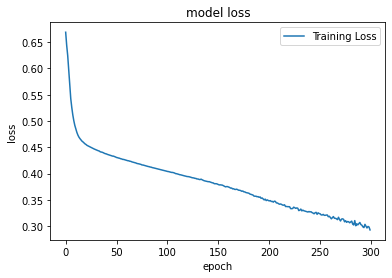

In [270]:
plt.plot(epochs_list,loss_list, label="Training Loss")
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()
plt.show()

## Evaluate

We use `eval()` to set network's layers to evaluation mode before running inference.<br>
If we wish to resuming training, we can call `network.train()` to set these layers to training mode.

In [271]:
network.eval()

Sequential(
  (0): Linear(in_features=8, out_features=64, bias=True)
  (1): ReLU()
  (2): Linear(in_features=64, out_features=32, bias=True)
  (3): ReLU()
  (4): Linear(in_features=32, out_features=16, bias=True)
  (5): ReLU()
  (6): Linear(in_features=16, out_features=1, bias=True)
  (7): Sigmoid()
)

Data transformation for the test set

In [272]:
type(X_test)

torch.Tensor

In [273]:
X_test = torch.tensor(X_test, dtype=torch.float)
type(X_test)

<ipython-input-273-3a1fc5379980>:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_test = torch.tensor(X_test, dtype=torch.float)


torch.Tensor

### Test model performance

As we can see the model returned us a list with probabilities

In [274]:
predictions = network.forward(X_test)
predictions[:5]

tensor([[2.7093e-01],
        [1.1276e-04],
        [8.6753e-01],
        [3.0410e-02],
        [2.7298e-01]], grad_fn=<SliceBackward>)

We will replace the list of probabilities with a list of booleans. For the sake of this matter, we will use a threshold of 0.5

In [275]:
predictions = np.array(predictions > 0.5)
predictions[:5]

array([[False],
       [False],
       [ True],
       [False],
       [False]])

In [276]:
y_test[:5]

array([0, 0, 1, 0, 1])

In [277]:
accuracy_score(y_test, predictions)

0.7604166666666666

In [278]:
cm = confusion_matrix(y_test, predictions)
cm

array([[103,  15],
       [ 31,  43]])

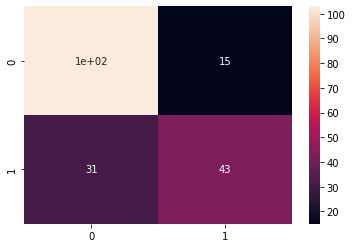

In [279]:
import seaborn as sns
sns.heatmap(cm, annot=True)